In [46]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

from sklearn.metrics import accuracy_score

In [29]:
#load training and testing data
train_df=pd.read_csv("/content/train.csv")
test_df=pd.read_csv("/content/test.csv")

In [30]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [34]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [36]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

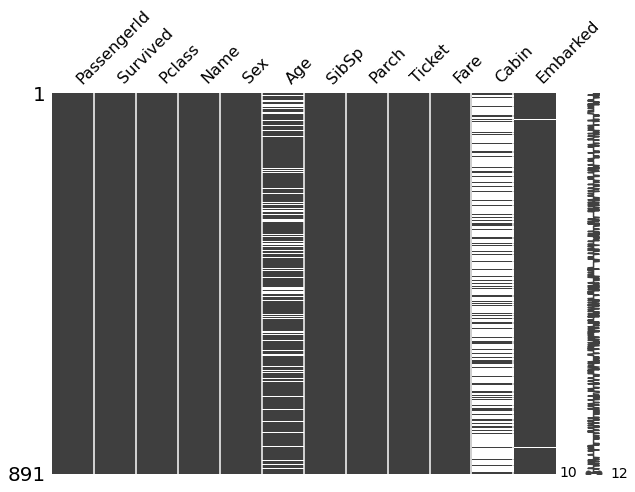

In [37]:
import missingno

missingno.matrix(train_df, figsize=(10,7))

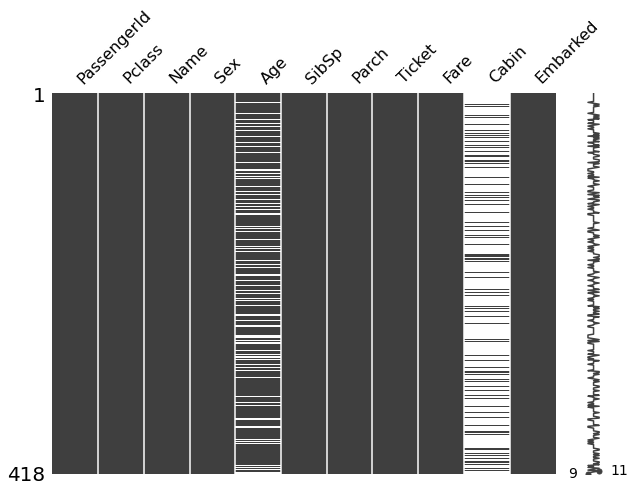

In [38]:
missingno.matrix(test_df, figsize=(10,7))

     PassengerId  Survived   Age     Fare
0              1         0  22.0   7.2500
1              2         1  38.0  71.2833
2              3         1  26.0   7.9250
3              4         1  35.0  53.1000
4              5         0  35.0   8.0500
..           ...       ...   ...      ...
885          886         0  39.0  29.1250
886          887         0  27.0  13.0000
887          888         1  19.0  30.0000
889          890         1  26.0  30.0000
890          891         0  32.0   7.7500

[711 rows x 4 columns]


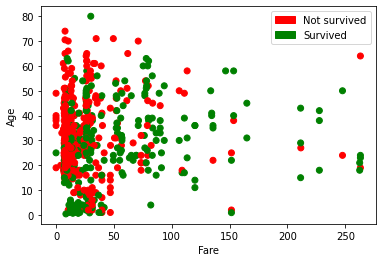

In [47]:
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")
test_results = pd.read_csv("/content/gender_submission.csv")

# preprocessing

# dropping columns with mixed, irrelevant and less data points
train_data = train_data.drop("Cabin", axis=1)
train_data = train_data.drop("Name", axis=1)
train_data = train_data.drop("Ticket", axis=1)
train_data = train_data.drop("SibSp", axis=1)
train_data = train_data.drop("Parch", axis=1)
train_data = train_data.drop("Embarked", axis=1)
train_data = train_data.drop("Pclass", axis=1)
train_data = train_data.drop("Sex", axis=1)

# removing null and sparse data points
train_data = train_data.dropna(how='any',axis=0) 
train_data.drop(train_data[train_data["Fare"]>300].index, inplace=True)

print(train_data)

# using age and fare for this model
colormap = np.array(['r', 'g'])
x = train_data['Fare'].tolist()
y = train_data['Age'].tolist()
plt.scatter(x, y, c=colormap[train_data['Survived'].to_numpy()])
plt.xlabel("Fare")
plt.ylabel("Age")
red = mpatches.Patch(color='red', label='Not survived')
green = mpatches.Patch(color='green', label='Survived')
plt.legend(handles=[red,green])


In [48]:
# this function is used to calculate euclidean distance
def euclid_dist(x1, y1, x2, y2):  
  return ((x2-x1)**2 + (y2-y1)**2)**0.5

In [49]:
# this function is used to get the data points for survived and not survived
def data_points(train_data):
  
  data_points_into_class = {}
  for X_train_x, X_train_y, y_train in zip(train_data["Fare"].to_list(), 
                                           train_data["Age"].to_list(), 
                                           train_data["Survived"].to_list()):
    if y_train not in data_points_into_class.keys(): 
      data_points_into_class[y_train] = [(X_train_x, X_train_y)]
    else : data_points_into_class[y_train].append((X_train_x, X_train_y))

  return data_points_into_class

In [50]:
# this function is used to predict the output using knn method
def predict_knn(data, test_data, threshold):
  y_test = {}
  dists = []
  for X_test_x, X_test_y, id in zip(test_data["Fare"].to_list(), 
                                    test_data["Age"].to_list(), 
                                    test_data["PassengerId"].to_list()):
    # calculate distance of test data point with trained data points
    for i, j in data.items():
      for k in j:
        dist = euclid_dist(k[0], k[1], X_test_x, X_test_y)
        if dist <= threshold: dists.append(dist)
      if i == 1: survived_dists = dists
      else : not_survived_dists = dists
      dists = []
    # if many data points are closer to survived then prediction is 1 else 0
    if len(survived_dists)>len(not_survived_dists): p = 1
    else : p = 0
    y_test[id] = p
  return y_test

In [52]:
def calculate_accuracy(y_test, df):
    accuracy = 0
    df_dict = {}
    for i,j in zip(df['PassengerId'].values, df['Survived'].values):
      df_dict[i] = j
    for i,j in y_test.items():
      if y_test[i] == df_dict[i]: accuracy = accuracy + 1
    return str((accuracy/len(y_test.values())*100))

In [54]:
if __name__ == "__main__":
  data_points_into_class = data_points(train_data)
  # using 30 as threshold distance 
  predictions = predict_knn(data_points_into_class, test_data, 30)
  accuracy = calculate_accuracy(predictions, test_results)
  print("The accuracy of the knn model", accuracy)


The accuracy of the knn model 65.78947368421053
